In [1]:
categories=['alt.atheism','soc.religion.christian','comp.graphics','sci.med']

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)

In [4]:
import pandas as pd
import helpers.data_mining_helpers as dmh

In [5]:
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train),columns=['text'])

In [6]:
X['category']=twenty_train.target
X['category_name']=X.category.apply(lambda t:dmh.format_labels(t,twenty_train))

In [7]:
### (Take Home) Exercise 2
X.loc[:, lambda df: ['text', 'category_name']]

text  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...   
...                                                 ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 2 columns]

In [8]:
### (Take Home) Exercise 5
"""
Those 3 'True' results of isNull() function at position 0,1 and 4 are explained as: 
    1. value in 'missing_value' column on row 0 is declared as empty by numpy.nan
    2. value in 'missing_value' column on row 1 is left blank (not declared)
    3. value in 'missing_value' column on row 4 is declared as empty by syntax 'None'
"""

"\nThose 3 'True' results of isNull() function at position 0,1 and 4 are explained as: \n    1. value in 'missing_value' column on row 0 is declared as empty by numpy.nan\n    2. value in 'missing_value' column on row 1 is left blank (not declared)\n    3. value in 'missing_value' column on row 4 is declared as empty by syntax 'None'\n"

In [9]:
### (Take Home) Exercise 6
"""
normal sample() method does not modify the origin dataframe X, unless setting parameter replace to True and sampling size is larger than original dataframe
"""

'\nnormal sample() method does not modify the origin dataframe X, unless setting parameter replace to True and sampling size is larger than original dataframe\n'

In [10]:
### (Take Home) Exercise 8

X_sample = X.sample(n=1000)
X_type = X.category_name.value_counts()
X_sample_type = X_sample.category_name.value_counts()
df = pd.DataFrame({'X': X_type,'X_sample': X_sample_type}, index=categories)
ax = df.plot.bar(rot=0, fontsize = 11, figsize=(8,8))

In [11]:
### (Take Home) Exercise 10

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
organized_X = X_counts[0:5, 0:100].toarray()
for idt,valt in enumerate(organized_X):
    for idx, val in enumerate(valt):
        if val == 1:
            if idx != 0:
                value = count_vect.get_feature_names()[idx-1:idx]
print(value)

['00pm']


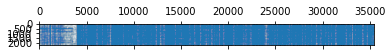

In [12]:
### (Take Home) Exercise 11

# One option to consider is using stopwords parameter to reduce meaningless dimensions 
# in addition to utilizing matplotlib.pylab with very tiny-size point to display cell with value '1' as below:

stopwords_removed_count_vect = CountVectorizer(max_df=0.85, stop_words = 'english')
new_X_counts = stopwords_removed_count_vect.fit_transform(X.text)

import matplotlib.pylab as plt
plt.spy(new_X_counts, markersize=0.004)


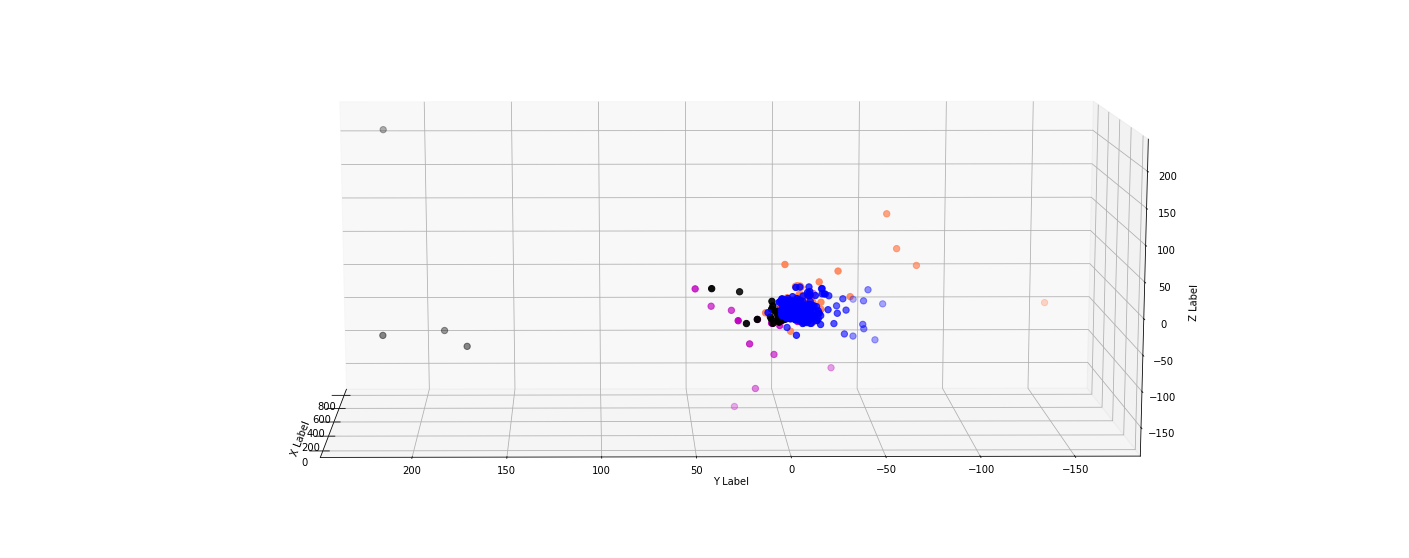

'\n    Considering the showed graphs with rotated angle (respective degree as:0, 45, 90, 135, 180), \n    there is a specific region that most of the data is crowded, which lie in the area of:\n    X from 0 to 100; Y from -50 to 0; Z from -50 to -100\n                                                                                        '

In [13]:
### (Take Home) Exercise 12

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt  
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3D[X['category_name'] == category].T[0]
    ys = X_reduced_3D[X['category_name'] == category].T[1]
    zs = X_reduced_3D[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, s= 40, c = c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

for angle in range(0, 180):
    ax.view_init(elev=10., azim=angle)
plt.show()

"""
    Considering the showed graphs with rotated angle (respective degree as:0, 45, 90, 135, 180), 
    there is a specific region that most of the data is crowded, which lie in the area of:
    X from 0 to 100; Y from -50 to 0; Z from -50 to -100
                                                                                        """


In [14]:
### (Take Home) Exercise 13

## Only seen when we zoom in the bottom left corner several times ##
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()
import numpy as np
import plotly.graph_objs as go

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

x_value = count_vect.get_feature_names()[:100]
y_value = term_frequencies[:100]

fig = go.Figure([go.Bar(x=x_value, y=y_value)])
fig.show()

In [15]:
### (Take Home) Exercise 14
from sklearn.feature_extraction.text import TfidfVectorizer

term_frequencies = []
vectorizer = TfidfVectorizer()
X_counts = vectorizer.fit_transform(X.text)
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

selected_term =[]
for k in range(0,len(term_frequencies)):
    if term_frequencies[k] > 1:
        selected_term.append(term_frequencies[k])


"""
By utulizing TfidfVectorizer package from sklearn, we can easily canculate TF-IDF value of each term in the vocabulary. 
In other to focus on specific key word of each document, we can set the minimum threshold so that a term will be chosen 
for visualizing is 1, which dramatically scale down the size of data from 35788 terms to 3789 terms
"""

'\nBy utulizing TfidfVectorizer package from sklearn, we can easily canculate TF-IDF value of each term in the vocabulary. \nIn other to focus on specific key word of each document, we can set the minimum threshold so that a term will be chosen \nfor visualizing is 1, which dramatically scale down the size of data from 35788 terms to 3789 terms\n'

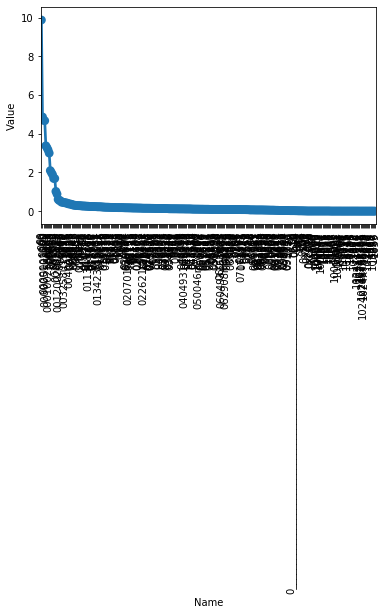

In [16]:
### (Take Home) Exercise 15

import pandas as pd
import matplotlib.pyplot as plt

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

percentile_list = pd.DataFrame(
    {'lst1Title': term_frequencies[:300],
     'lst2Title': count_vect.get_feature_names()[:300]
    })

percentile_list = percentile_list.sort_values('lst1Title', ascending = False).reset_index(drop=True)

import seaborn as sns
ax = sns.pointplot(x=percentile_list.lst2Title, y=percentile_list.lst1Title)
ax.set_xlabel("Name")
ax.set_ylabel("Value")

_ = ax.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [17]:
### (Take Home) Exercise 16
"""
It is possible to do binarization using category_name column, as showed below:
"""  
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:30] #display some rows for confirmation

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13  Subject: So what is Maddi? From: madhaus@netco...         0   
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
17  Organization: Penn State University From: <JSN...         0   
18  From: tom_milligan@rainbow.mentorg.com Subject...         3   
19  Subject: Re: Don't more innocents die without ...         0   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
21  From: gmiller@worldbank.org (Gene C. Miller) S...         0   
22  From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
23  From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...         1   
24  From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...         1   
25  From: dstampe@psych.toronto.edu (Dave Stampe) ...         1   
26  From: christian@geneva.rutgers.edu Subject: en...         3   
27  From: ruthless@panix.com (Ruth Ditucci) Subjec...         3   
28  From: rind@enterprise.bih.harvard.edu (David R...         2   
29  From: spp@zabriskie.berkeley.edu (Steve Pope) ...         2   

             category_name  bin_category  
0            comp.graphics  [0, 1, 0, 0]  
1            comp.graphics  [0, 1, 0, 0]  
2   soc.religion.christian  [0, 0, 0, 1]  
3   soc.religion.christian  [0, 0, 0, 1]  
4   soc.religion.christian  [0, 0, 0, 1]  
5   soc.religion.christian  [0, 0, 0, 1]  
6   soc.religion.christian  [0, 0, 0, 1]  
7                  sci.med  [0, 0, 1, 0]  
8                  sci.med  [0, 0, 1, 0]  
9                  sci.med  [0, 0, 1, 0]  
10  soc.religion.christian  [0, 0, 0, 1]  
11           comp.graphics  [0, 1, 0, 0]  
12             alt.atheism  [1, 0, 0, 0]  
13             alt.atheism  [1, 0, 0, 0]  
14           comp.graphics  [0, 1, 0, 0]  
15           comp.graphics  [0, 1, 0, 0]  
16                 sci.med  [0, 0, 1, 0]  
17             alt.atheism  [1, 0, 0, 0]  
18  soc.religion.christian  [0, 0, 0, 1]  
19             alt.atheism  [1, 0, 0, 0]  
20  soc.religion.christian  [0, 0, 0, 1]  
21             alt.atheism  [1, 0, 0, 0]  
22  soc.religion.christian  [0, 0, 0, 1]  
23           comp.graphics  [0, 1, 0, 0]  
24           comp.graphics  [0, 1, 0, 0]  
25           comp.graphics  [0, 1, 0, 0]  
26  soc.religion.christian  [0, 0, 0, 1]  
27  soc.religion.christian  [0, 0, 0, 1]  
28                 sci.med  [0, 0, 1, 0]  
29                 sci.med  [0, 0, 1, 0]

In [18]:
#####################################  Assignment 01  #############################################

In [19]:
import pandas as pd

############# Data Preparation ##################
    #Load amazon data to dataframe
amazon_df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t", header=None)
amazon_df.columns = ["amazon_sentence","amazon_score"]

    #Load yelp data to dataframe
yelp_df = pd.read_csv('yelp_labelled.txt',delimiter="\t", header=None)
yelp_df.columns = ["yelp_sentence","yelp_score"]

    #Load imdb data to dataframe
imdb_df = pd.read_csv('imdb_labelled.txt',delimiter=" #", header=None)
imdb_df.columns = ["imdb_sentence","imdb_score"]

############# Data Preprocessing ##################
    #Get total value of Positive and Negative Review for Amazon 
positive_amazon = amazon_df['amazon_score'].eq(1).sum()
negative_amazon = amazon_df['amazon_score'].eq(0).sum()

    #Get total value of Positive and Negative Review for Yelp 
positive_yelp = yelp_df['yelp_score'].eq(1).sum()
negative_yelp = yelp_df['yelp_score'].eq(0).sum()

    #Get total value of Positive and Negative Review for imdb 
positive_imdb = imdb_df['imdb_score'].eq(1).sum()
negative_imdb = imdb_df['imdb_score'].eq(0).sum()

############# Data Visualisation ##################
import matplotlib.pyplot as plt
from plotly import graph_objs as go
%matplotlib inline

    #Display set of Postive/Negative review of each category(amazon, yelp, imdb) as a stacked bar chart
sites=['Amazon', 'Yelp', 'Imdb']
fig = go.Figure(data=[
    go.Bar(name='Positive Review', x=sites, y=[positive_amazon, positive_yelp, positive_imdb]),
    go.Bar(name='Negative Review', x=sites, y=[negative_amazon, negative_yelp, negative_imdb])  ])
fig.layout.update(barmode='stack')
fig.show()

## Which showed that these 3 dataset have been sampled with exact 500 positive review (1) and 500 negative review (0)

c:\users\solo_\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



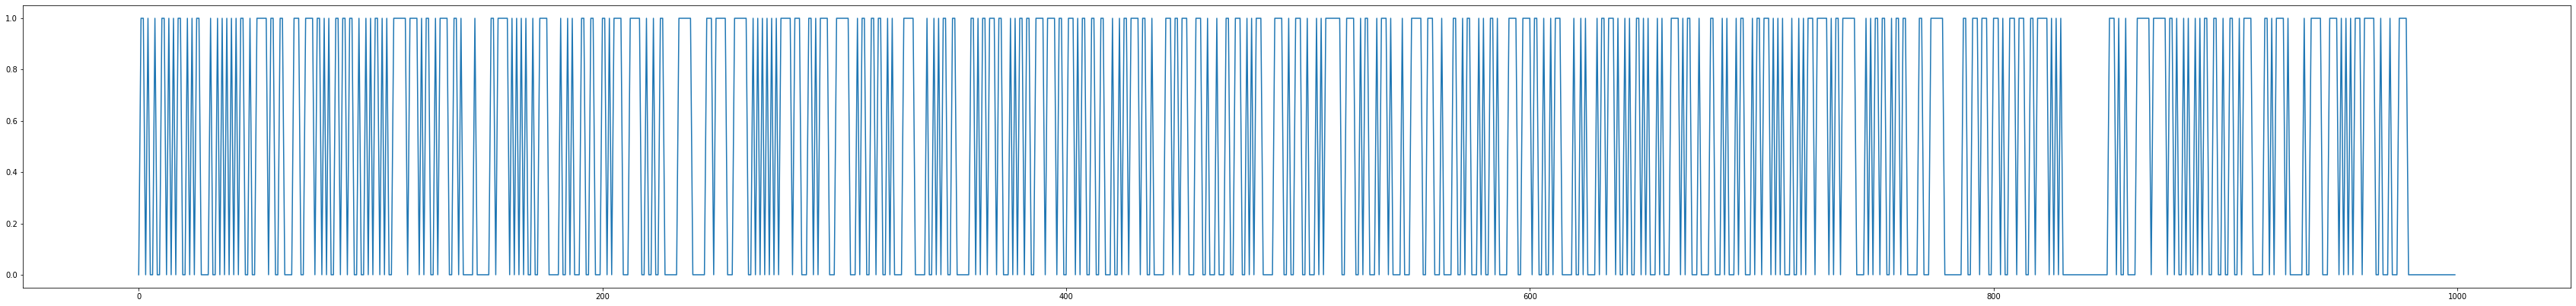

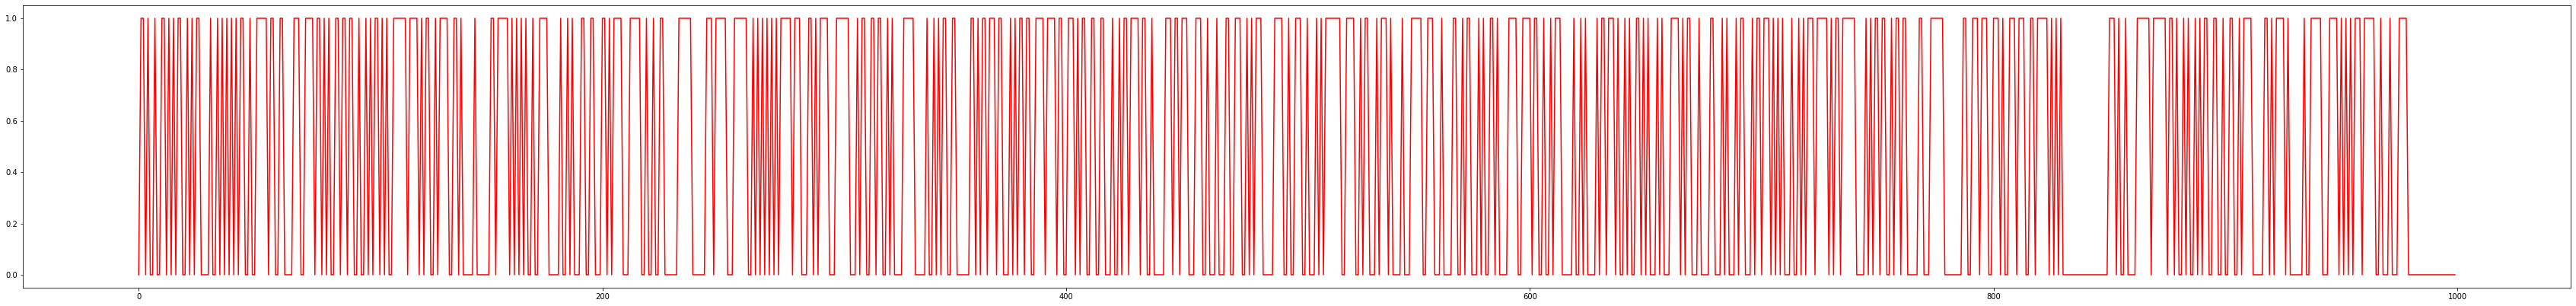

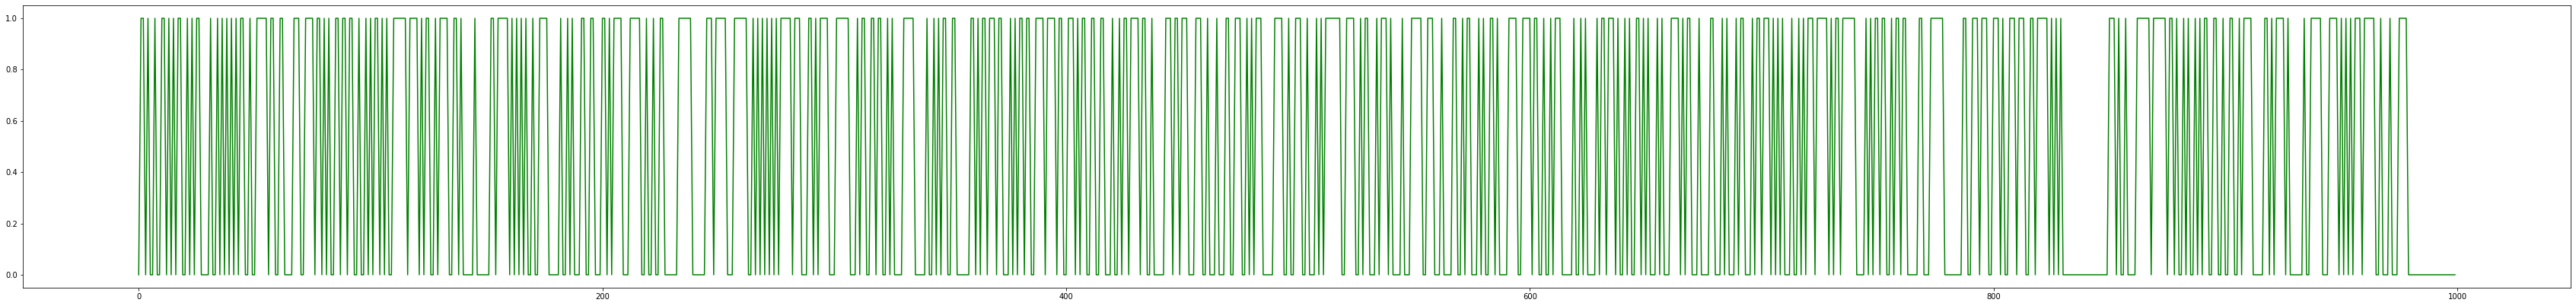

In [20]:
############# Data Visualisation ##################
    
#Binary chart to show distribution between 0(negative) and 1(positive) of amazon site
amazon_review = amazon_df.amazon_score.values
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(211)
ax.plot(amazon_review)

#Binary chart to show distribution between 0(negative) and 1(positive) of yelp site
yelp_review = yelp_df.yelp_score.values
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(211)
ax.plot(amazon_review, color='red')

#Binary chart to show distribution between 0(negative) and 1(positive) of imdb site
imdb_review = imdb_df.imdb_score.values
fig = plt.figure(figsize=(60, 15))
ax = fig.add_subplot(211)
ax.plot(amazon_review, color='green')

## Which showed that these 3 datasets have been sampled with exactly same orders of 0s and 1s.
## 0s and 1s have been equally distributed along the each dataset with less case of bias.

In [21]:
############# Data Preprocessing ##################

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words = 'english')

# Creating Document-term matrix for each dataset with stopwords removed, that result in dramatic reduction of dimensions
# and helping in extracting important feature
amazon_counts = count_vect.fit_transform(amazon_df.amazon_sentence)
yelp_counts = count_vect.fit_transform(yelp_df.yelp_sentence)
imdb_counts = count_vect.fit_transform(imdb_df.imdb_sentence)

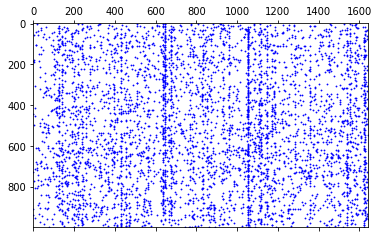

In [22]:
############# Data Visualisation ##################

import matplotlib.pylab as plt

# visualize the amazon document-term sparse matrix with Spy
plt.spy(amazon_counts, markersize=0.75, color = 'blue')


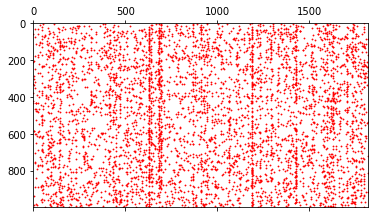

In [23]:
############# Data Visualisation ##################

# visualize the yelp document-term sparse matrix with Spy
plt.spy(yelp_counts, markersize=0.75, color = 'red')

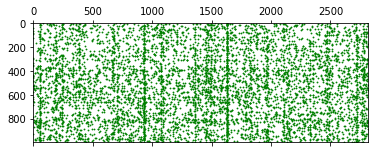

In [24]:
############# Data Visualisation ##################

# visualize the imdb document-term sparse matrix with Spy
plt.spy(imdb_counts, markersize=0.75, color = 'green')

## Comparing between those 3 visualization graphs, we can tell clearly that imdb dataset has more term than yelp,
## and the least term goes to amazon. There are some specific words appear at almost all sentences for each dataset, 
## which is likely useful for similarity extraction

In [25]:
############# Data Preprocessing ##################

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
vect = TfidfVectorizer(stop_words = 'english')

# Calculate TF-IDF for each terms in amazon dataset with stopwords removed

tfidf_amazon_matrix = vect.fit_transform(amazon_df.amazon_sentence)
amazon_terms = vect.get_feature_names()
amazon_terms_sums = tfidf_amazon_matrix.sum(axis=0)

amazon_tfidf_data = []
for col, term in enumerate(amazon_terms):
    amazon_tfidf_data.append((term, amazon_terms_sums[0,col]))

amazon_tfidf_ranking = pd.DataFrame(amazon_tfidf_data, columns=['term','rank_value'])
sorted_amazon_terms_df = amazon_tfidf_ranking.sort_values('rank_value', ascending=False)

############# Data Visualisation ##################
from plotly import graph_objs as go
terms = sorted_amazon_terms_df['term'][0:50]
fig = go.Figure([go.Bar(x=terms, y=sorted_amazon_terms_df['rank_value'][0:50], marker_color='lightsalmon')])
fig.layout.update(title_text='Amazon Dataset')
fig.show()

In [26]:
############# Data Preprocessing ##################

# Calculate TF-IDF for each terms in yelp dataset with stopwords removed

tfidf_yelp_matrix = vect.fit_transform(yelp_df.yelp_sentence)
yelp_terms = vect.get_feature_names()
yelp_terms_sums = tfidf_yelp_matrix.sum(axis=0)

yelp_tfidf_data = []
for col, term in enumerate(yelp_terms):
    yelp_tfidf_data.append((term, yelp_terms_sums[0,col]))

yelp_tfidf_ranking = pd.DataFrame(yelp_tfidf_data, columns=['term','rank_value'])
sorted_yelp_terms_df = yelp_tfidf_ranking.sort_values('rank_value', ascending=False)

############# Data Visualisation ##################
from plotly import graph_objs as go
terms = sorted_yelp_terms_df['term'][0:50]
fig = go.Figure([go.Bar(x=terms, y=sorted_yelp_terms_df['rank_value'][0:50], marker_color='blue')])
fig.layout.update(title_text='Yelp Dataset')
fig.show()

In [27]:
############# Data Preprocessing ##################

# Calculate TF-IDF for each terms in imdb dataset with stopwords removed

tfidf_imdb_matrix = vect.fit_transform(imdb_df.imdb_sentence)
imdb_terms = vect.get_feature_names()
imdb_terms_sums = tfidf_imdb_matrix.sum(axis=0)

imdb_tfidf_data = []
for col, term in enumerate(imdb_terms):
    imdb_tfidf_data.append((term, imdb_terms_sums[0,col]))

imdb_tfidf_ranking = pd.DataFrame(imdb_tfidf_data, columns=['term','rank_value'])
sorted_imdb_terms_df = imdb_tfidf_ranking.sort_values('rank_value', ascending=False)

############# Data Visualisation ##################
from plotly import graph_objs as go
terms = sorted_imdb_terms_df['term'][0:50]
fig = go.Figure([go.Bar(x=terms, y=sorted_imdb_terms_df['rank_value'][0:50], marker_color='green')])
fig.layout.update(title_text='Imdb Dataset')
fig.show()

In [28]:
############# Data Exploration ##################

from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity to define percentages of common features between datasets

amazon_data = []
yelp_data = []
imdb_data = []

# concatenate all values in sentence column to 1 sentence for each dataset
amazon_data.append(amazon_df['amazon_sentence'].str.cat(sep=' '))
yelp_data.append(yelp_df['yelp_sentence'].str.cat(sep=' '))
imdb_data.append(imdb_df['imdb_sentence'].str.cat(sep=' '))

# Transform sentence with Vectorizers
cos_amazon_counts = count_vect.transform(amazon_data)
cos_yelp_counts = count_vect.transform(yelp_data)
cos_imdb_counts = count_vect.transform(imdb_data)

# Calculate Cosine Similarity
cos_sim_count_amazon_yelp = cosine_similarity(cos_amazon_counts, cos_yelp_counts, dense_output=True)
cos_sim_count_amazon_imdb = cosine_similarity(cos_amazon_counts, cos_imdb_counts, dense_output=True)
cos_sim_count_yelp_imdb = cosine_similarity(cos_yelp_counts, cos_imdb_counts, dense_output=True)

# Print 
print("Cosine Similarity using count between Amazon and Yelp: %(x)f" %{"x":cos_sim_count_amazon_yelp})
print("Cosine Similarity using count between Amazon and Imdb: %(x)f" %{"x":cos_sim_count_amazon_imdb})
print("Cosine Similarity using count between Yelp and Imdb: %(x)f" %{"x":cos_sim_count_yelp_imdb})

### From the result we can see Amazon and Yelp have more common similar feature than Imdb

Cosine Similarity using count between Amazon and Yelp: 0.614025
Cosine Similarity using count between Amazon and Imdb: 0.378000
Cosine Similarity using count between Yelp and Imdb: 0.405235


In [29]:
############# Data Exploration ##################

# Build Multinomial Naive Bayes classifier to classify statistics of analysis terms 
# within combination of 3 datasets and predict the sentiment to each review 
# (whether it is possitive or negative) by utilizing TF-IDF 

import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold

corpus = []
amazon_corpus = []
yelp_corpus = []
imdb_corpus = []
# Create a corpus with each sentence as a string
amazon_corpus = amazon_df['amazon_sentence']
yelp_corpus = yelp_df['yelp_sentence']
imdb_corpus = imdb_df['imdb_sentence']
corpus = np.concatenate((amazon_corpus, yelp_corpus, imdb_corpus))

# Stratified 10-cross fold validation with Multinomial NB
total_length = len(corpus)
middle = int(total_length/2)

labels = np.zeros(total_length)
labels[0:middle]=0
labels[middle:total_length]=1
 
kf = StratifiedKFold(n_splits=10) # Divide whole dataset of 3000 sentences into 10 groups,
                                  # take 1 as testing set and other 9 as training set rotatingly.
totalNB = 0                     # Accuracy measure on 3000 sentences 
totalMatNB = np.zeros((2,2))    # Confusion matrix on 3000 sentences
 
for train_index, test_index in kf.split(corpus,labels):
    X_train = [corpus[i] for i in train_index]
    X_test = [corpus[i] for i in test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]
    vectorizer = TfidfVectorizer(min_df=5, max_df = 0.85, sublinear_tf=True, use_idf=True,stop_words='english')
    train_corpus_tf_idf = vectorizer.fit_transform(X_train)
    test_corpus_tf_idf = vectorizer.transform(X_test)
 
    model2 = MultinomialNB()
    model2.fit(train_corpus_tf_idf,y_train)
    result2 = model2.predict(test_corpus_tf_idf)
 
    totalMatNB = totalMatNB + confusion_matrix(y_test, result2)
    totalNB = totalNB+sum(y_test==result2)

df_cm = pd.DataFrame(totalMatNB, index = [i for i in ["Actual Negative(0)","Actual Positive(1)"]], 
                     columns = [i for i in ["Predicted Negative(0)","Predicted Positive(1)"]])
    
print(df_cm)
print("         ")
print("Accuracy Percentage of prediction from Multinomial NB classifier: %(x)f" %{"x":totalNB/30.0})

                    Predicted Negative(0)  Predicted Positive(1)
Actual Negative(0)                 1119.0                  381.0
Actual Positive(1)                  477.0                 1023.0
         
Accuracy Percentage of prediction from Multinomial NB classifier: 71.400000


In [30]:
############# Data Exploration ##################

# Build Multinomial Naive Bayes classifier to classify statistics of analysis terms 
# within combination of 3 datasets and predict the sentiment to each review 
# (whether it is possitive or negative) by utilizing Document-Term frequency

import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
 
corpus = []
amazon_corpus = []
yelp_corpus = []
imdb_corpus = []
# Create a corpus with each document having one string
amazon_corpus = amazon_df['amazon_sentence']
yelp_corpus = yelp_df['yelp_sentence']
imdb_corpus = imdb_df['imdb_sentence']
corpus = np.concatenate((amazon_corpus, yelp_corpus, imdb_corpus))

# Stratified 10-cross fold validation with Multinomial NB
total_length = len(corpus)
middle = int(total_length/2)

labels = np.zeros(total_length)
labels[0:middle]=0
labels[middle:total_length]=1
 
kf = StratifiedKFold(n_splits=10) # Divide whole dataset of 3000 sentences into 10 groups,
                                  # take 1 as testing set and other 9 as training set rotatingly.
totalNB = 0                     # Accuracy measure on 3000 sentences 
totalMatNB = np.zeros((2,2))    # Confusion matrix on 3000 sentences
 
for train_index, test_index in kf.split(corpus,labels):
    X_train = [corpus[i] for i in train_index]
    X_test = [corpus[i] for i in test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]
    vectorizer = CountVectorizer(min_df=5, max_df = 0.85,stop_words='english')
    train_corpus_tf_idf = vectorizer.fit_transform(X_train)
    test_corpus_tf_idf = vectorizer.transform(X_test)
 
    model2 = MultinomialNB()
    model2.fit(train_corpus_tf_idf,y_train)
    result2 = model2.predict(test_corpus_tf_idf)
 
    totalMatNB = totalMatNB + confusion_matrix(y_test, result2)
    totalNB = totalNB+sum(y_test==result2)

df_cm = pd.DataFrame(totalMatNB, index = [i for i in ["Actual Negative(0)","Actual Positive(1)"]], 
                     columns = [i for i in ["Predicted Negative(0)","Predicted Positive(1)"]])
    
print(df_cm)
print("         ")
print("Accuracy Percentage of prediction from Multinomial NB classifier: %(x)f" %{"x":totalNB/30.0})

### Comparing result between applying Multinomial NB on TF-IDF feature and Term frequency feature, predicting  
### basing on TF-IDF give higher accuracy.

                    Predicted Negative(0)  Predicted Positive(1)
Actual Negative(0)                 1123.0                  377.0
Actual Positive(1)                  485.0                 1015.0
         
Accuracy Percentage of prediction from Multinomial NB classifier: 71.266667
